To generate the correct conda environment:

> conda create -n week10 -c bioconda -c anaconda python=3.6 scanpy jupyter

> conda activate week10

In [1]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("/Users/cmdb/qbb2020-answers/week8-assignment/neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Step 1: Filtering

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


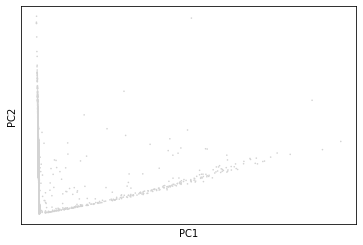

In [2]:
# plotting PCA before filtering
sc.tl.pca(adata)
sc.pl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


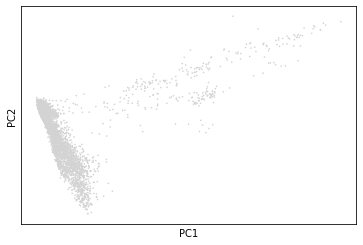

In [3]:
# filtering and plotting PCA after filtering
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata)
sc.pl.pca(adata)

# Step 2: Clustering

In [4]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


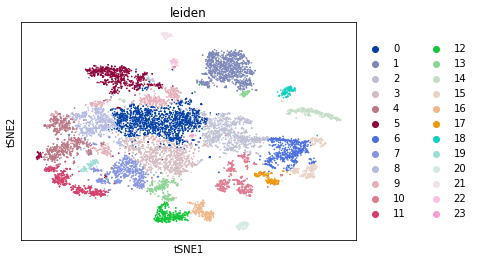

In [5]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color="leiden")

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


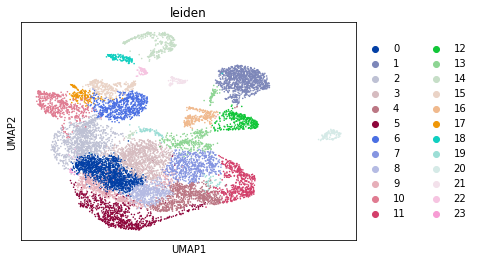

In [6]:
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden")

# Step 3: Distinguising genes

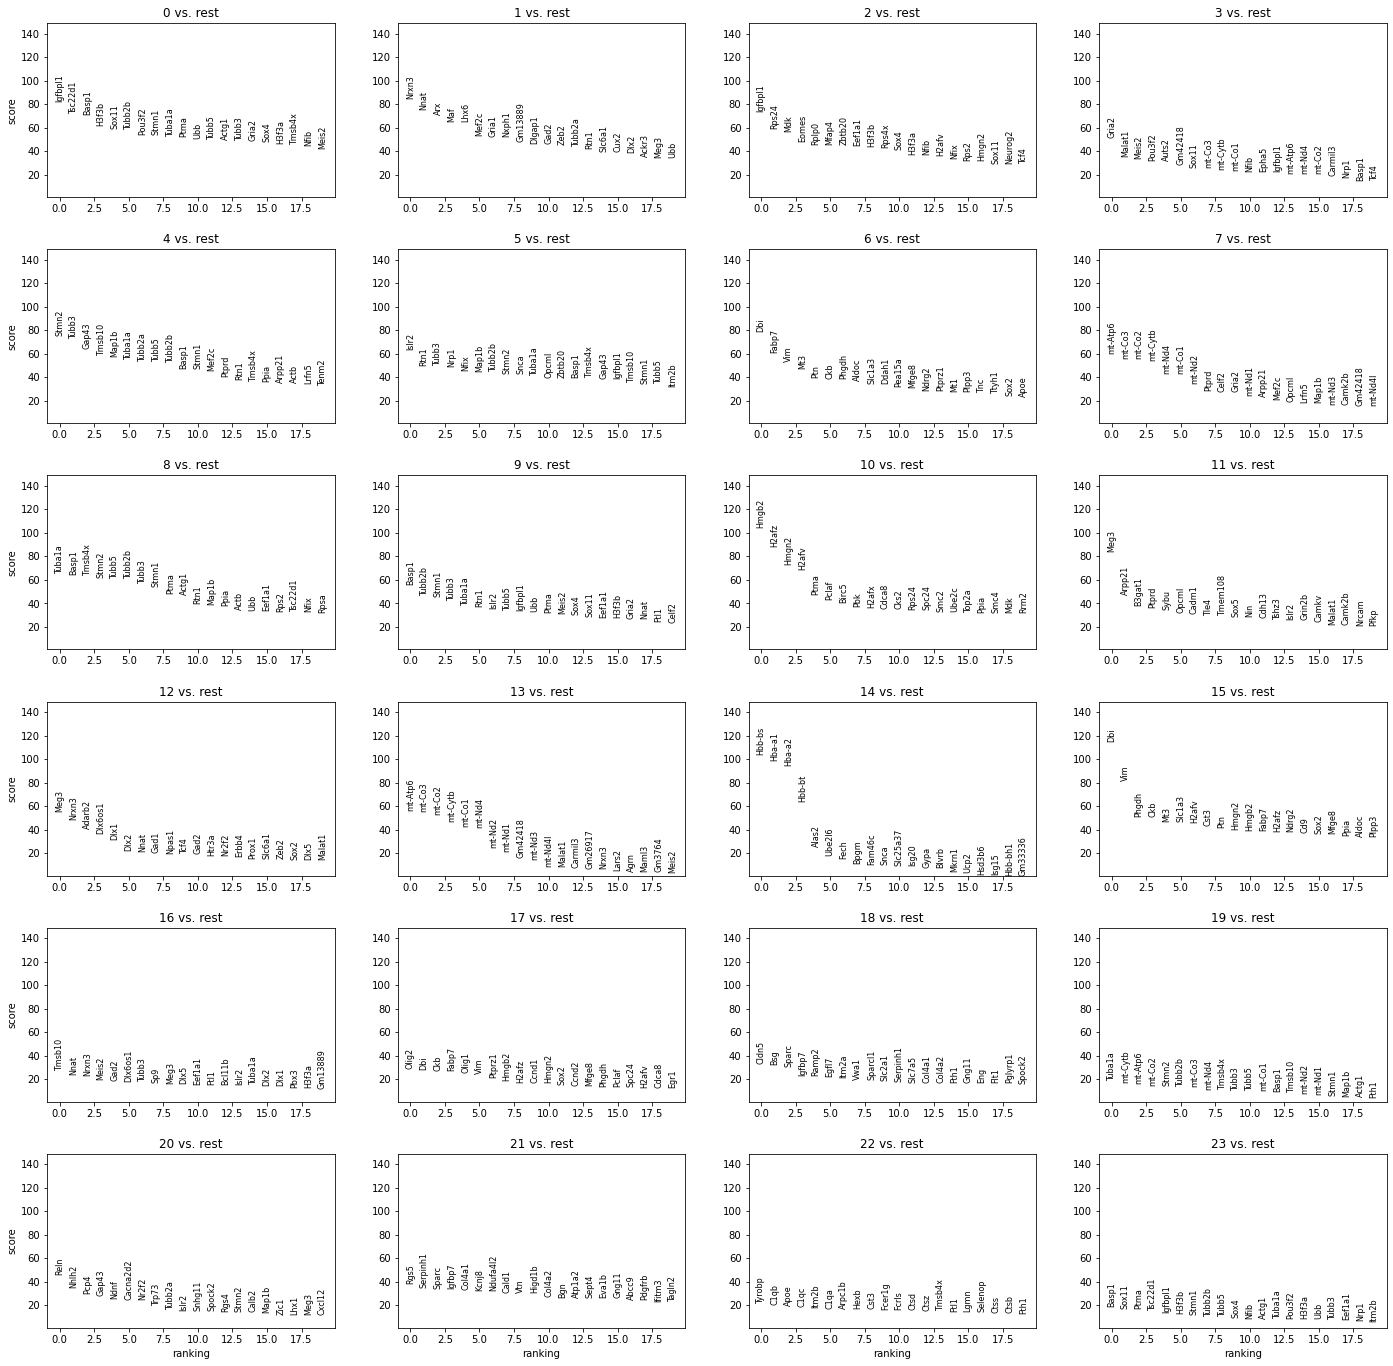

In [11]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')
sc.pl.rank_genes_groups(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


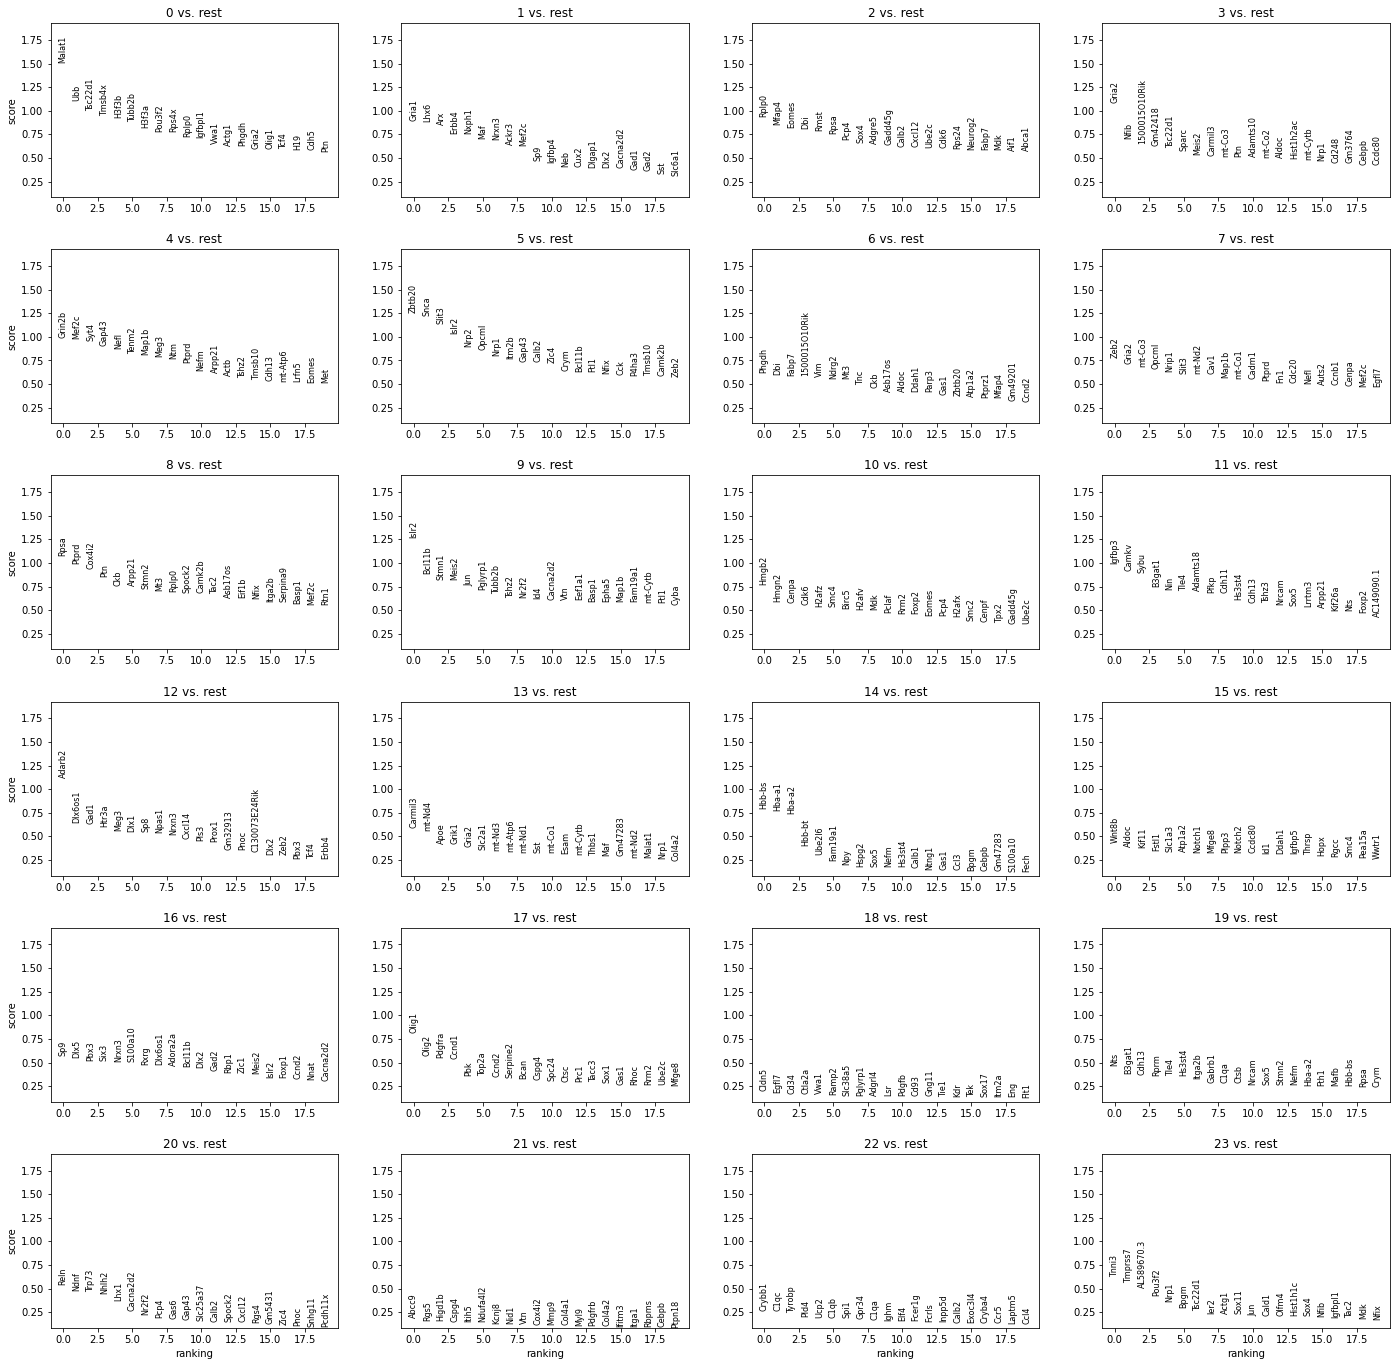

In [13]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='logreg')
sc.pl.rank_genes_groups(adata)

# Step 4: Cell types?

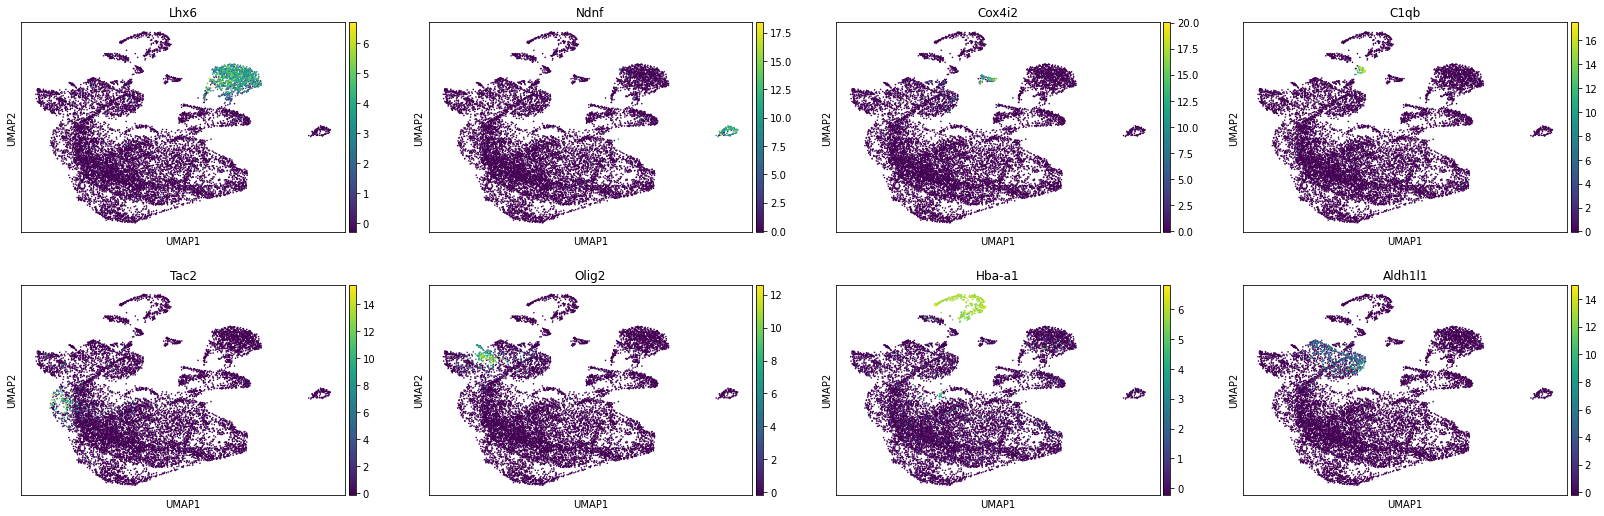

In [139]:
sc.pl.umap(adata, color=["Lhx6", "Ndnf", "Cox4i2", "C1qb", "Tac2", "Olig2", "Hba-a1", "Aldh1l1"])

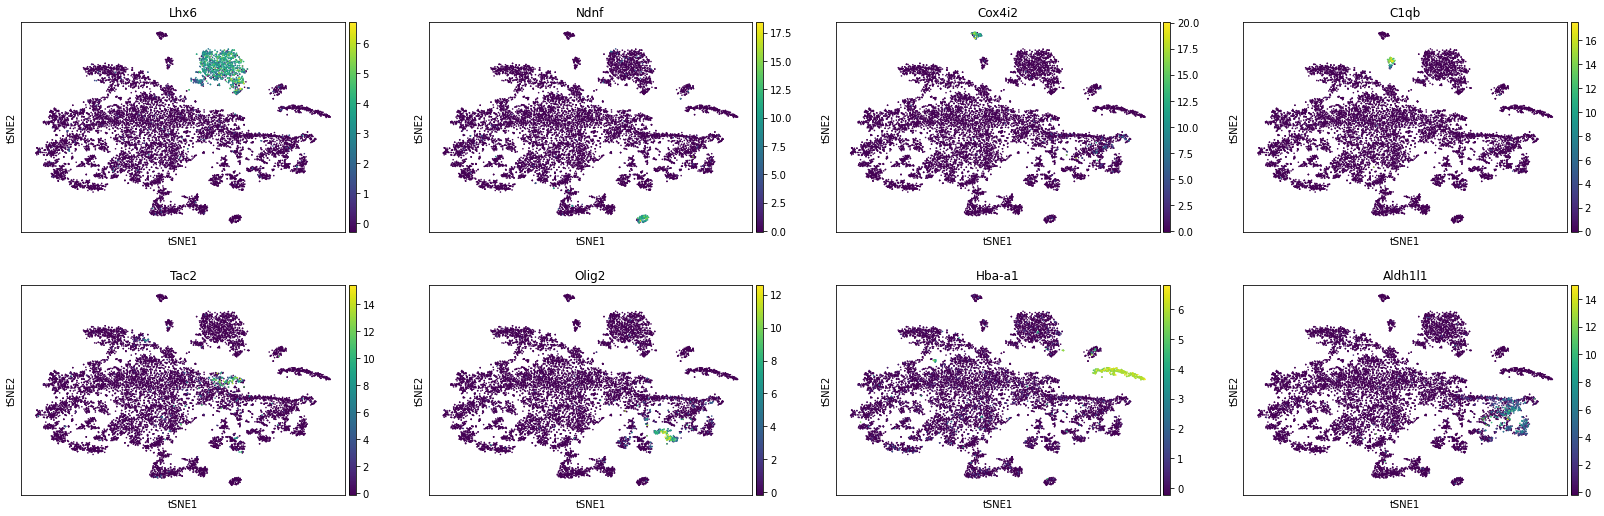

In [156]:
sc.pl.tsne(adata, color=["Lhx6", "Ndnf", "Cox4i2", "C1qb", "Tac2", "Olig2", "Hba-a1", "Aldh1l1"])

Ndnf = cortical interneuron

Hba-a1 = Red blood cell

Olig2 = oligodendrocytes

C1qa = Microglia

Aldh1l1 = Astrocyte

Cox4i2 = Pericyte

Lhx6 = Paravalbumin and somastatin interneuron

Tac2 = Dorsal root ganglia

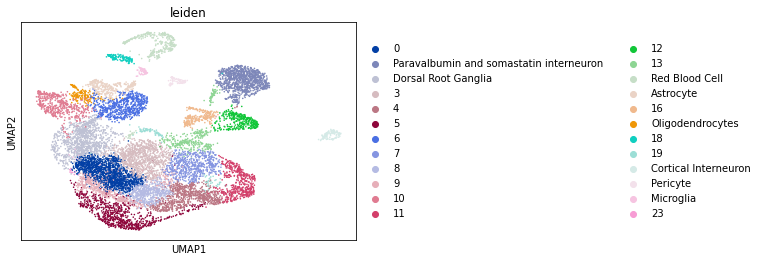

In [155]:
new_names = ['0', 'Paravalbumin and somastatin interneuron', 'Dorsal Root Ganglia', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 'Red Blood Cell', 'Astrocyte', '16', 'Oligodendrocytes', '18', '19', 'Cortical Interneuron', 'Pericyte', 'Microglia', '23']
adata.rename_categories('leiden', new_names)
sc.pl.umap(adata, color = "leiden")